<a href="https://colab.research.google.com/github/zzhu104/MAT494_HW/blob/main/HW2.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.4 MLE

Let $X_1,X_2,\cdots,X_n$ have joint pmf or pdf$$f (x_1, x_2,\cdots, x_n;\theta_1,\cdots,\theta_m)\hspace{5mm} (*)$$where the parameters $\theta_1,\cdots,\theta_m$ have unknown values. When $_1,\cdots, x_n$ are the observed sample values and (*) is regarded as a function of $\theta_1,\cdots,\theta_m$, it is called the likelihood function.

In [3]:
# import libraries
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import pymc3 as pm3
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# generate data
N = 100
x = np.linspace(0,20,N)
ϵ = np.random.normal(loc = 0.0, scale = 5.0, size = N)
y = 3*x + ϵ
df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


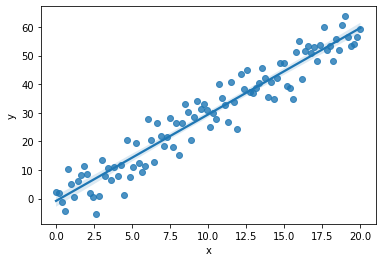

In [6]:
# plot
sns.regplot(df.x, df.y);

In [8]:
# split features and target
X = df[['constant', 'x']]
# fit model and summarize
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1161.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           3.84e-56
Time:                        04:41:07   Log-Likelihood:                -305.27
No. Observations:                 100   AIC:                             614.5
Df Residuals:                      98   BIC:                             619.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.8198      1.027     -0.798      0.427      -2.859       1.219
x              3.0245      0.089     34.080      0.000       2.848       3.201
==============================================================================
Omnibus:                        2.896   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                2.257
Skew:                          -0.224   Prob(JB):                        0.324
Kurtosis:                       2.416   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# define likelihood function
def MLERegression(params):
 intercept, beta, sd = params[0], params[1], params[2] # inputs are guesses at our parameters
 yhat = intercept + beta*x # predictions
# next, we flip the Bayesian question
# compute PDF of observed values normally distributed around mean (yhat)
# with a standard deviation of sd
 negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )
# return negative LL
 return(negLL)

In [16]:
# let’s start with some random coefficient guesses and optimize
guess = np.array([5,5,2])
results = minimize(MLERegression, guess, method = 'Nelder-Mead', 
 options={'disp': True})

Optimization terminated successfully.
         Current function value: 305.274984
         Iterations: 110
         Function evaluations: 192


In [17]:
resultsdf = pd.DataFrame({'coef':results['x']})
resultsdf.index=['constant','x','sigma']   
np.round(resultsdf.head(2), 4)

,coef
constant,-0.8198
x,3.0245
